In [39]:
# Importation des packaques et du dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re


# Importation du fichier de scraping
df = pd.read_csv('vgsales_visu.csv')

df = df[df['Publisher']=='Nintendo']
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,gamename,metaNote,metaNbVote,userNote,userNbVote,samename
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Wii Sports,76.0,51.0,8.1,453.0,1
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Classic NES Series: Super Mario Bros.,84.0,14.0,8.5,98.0,1
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Mario Kart Wii,82.0,73.0,8.4,1047.0,1
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Wii Sports Resort,80.0,73.0,8.2,293.0,1
4,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,Tetris 99,83.0,27.0,8.2,258.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10711,14971,Teddy Together,3DS,2016.0,Simulation,Nintendo,0.00,0.02,0.00,0.00,0.02,Teddy Together,3.0,1.0,0.0,0.0,1
11248,15994,Donkey Kong Jungle Beat,Wii,2008.0,Platform,Nintendo,0.00,0.01,0.00,0.00,0.01,New Play Control! Donkey Kong Jungle Beat,78.0,27.0,8.6,31.0,1
11417,16360,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015.0,Puzzle,Nintendo,0.00,0.00,0.01,0.00,0.01,Mario vs. Donkey Kong: Tipping Stars,70.0,26.0,7.5,72.0,1
11473,16459,Art Academy: Home Studio,WiiU,2015.0,Misc,Nintendo,0.00,0.00,0.01,0.00,0.01,Art Academy: Home Studio,82.0,9.0,7.9,22.0,1


In [40]:
# Recherche de série
df['serie']=0
for index,i in enumerate(df['Name']):
    for y in df['Name'] :
        if (i != y) & ((i in y) | (y in i)) :
            df['serie'].iloc[index]=1
        elif (df['serie'].iloc[index]!=1) :
            df['serie'].iloc[index]=0

            
# Faire moyenne des ventes par série


#salesByNintendoGame

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [68]:
# Remplacement des Notes par Quartile
df['metaNoteQ']=0

for index,i in enumerate(df['metaNote']):
    #print("i :",i)
    #print("index :",index)
    if (i==0):
        df['metaNoteQ'].iloc[index]=0
    elif (i<25):
        df['metaNoteQ'].iloc[index]=1
    elif (i<50):
        df['metaNoteQ'].iloc[index]=2
    elif (i<75):
        df['metaNoteQ'].iloc[index]=3
    else:
        df['metaNoteQ'].iloc[index]=4
    #print("metaNoteQ :",df['metaNoteQ'].iloc[index])

#df['metaNoteQ'] = pd.qcut(df['metaNote'], q=5, labels=[0, 1, 2, 3, 4])

#df[df['metaNoteQ']==0]
df['metaNoteQ'].value_counts()

df[df['metaNoteQ']==0]

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,gamename,metaNote,metaNbVote,userNote,userNbVote,samename,serie,metaNoteQ
8,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,Duck Hunt Challenge,0.0,4.0,0.0,0.0,1,0,0
159,188,Donkey Kong Country 2: Diddy's Kong Quest,SNES,1995.0,Platform,Nintendo,2.10,0.74,2.20,0.11,5.15,Donkey Kong Country 2: Diddy's Kong Quest,0.0,4.0,8.8,68.0,1,1,0
317,373,Donkey Kong Country 3: Dixie Kong's Double Tro...,SNES,1996.0,Platform,Nintendo,1.17,0.50,1.75,0.08,3.51,Donkey Kong Country 3: Dixie Kong's Double Tro...,0.0,4.0,8.3,33.0,1,1,0
466,546,Mario Paint,SNES,1992.0,Misc,Nintendo,1.43,0.54,0.71,0.07,2.75,AAA Super Mario Paint,0.0,4.0,0.0,0.0,1,0,0
490,574,Super Mario Bros.: The Lost Levels,NES,1986.0,Platform,Nintendo,0.00,0.00,2.65,0.00,2.65,Super Mario Bros.: The Lost Levels,0.0,4.0,6.1,35.0,1,1,0
491,575,Star Wars: Shadows of the Empire,N64,1996.0,Action,Nintendo,2.00,0.50,0.12,0.03,2.65,Star Wars: Shadows of the Empire,0.0,4.0,7.8,33.0,1,0,0
647,764,Super Mario RPG: Legend of the Seven Stars,SNES,1996.0,Role-Playing,Nintendo,0.66,0.00,1.45,0.03,2.14,Super Mario RPG: Legend of the Seven Stars,0.0,4.0,8.8,124.0,1,0,0
648,765,Mahjong,NES,1983.0,Misc,Nintendo,0.01,0.00,2.13,0.00,2.14,Mahjong,0.0,4.0,0.0,0.0,1,0,0
718,851,Super Street Fighter II,SNES,1993.0,Fighting,Nintendo,0.52,0.16,1.29,0.03,2.00,Super Street Fighter II,0.0,4.0,0.0,0.0,1,0,0
736,870,Soccer,NES,1985.0,Sports,Nintendo,0.18,0.23,1.53,0.02,1.96,World Soccer,0.0,4.0,0.0,0.0,1,1,0


In [71]:
#print("metaNoteQ :",df['metaNoteQ'].loc[13])
df.head(14)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,gamename,metaNote,metaNbVote,userNote,userNbVote,samename,serie,metaNoteQ
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Wii Sports,76.0,51.0,8.1,453.0,1,1,4
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Classic NES Series: Super Mario Bros.,84.0,14.0,8.5,98.0,1,1,4
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Mario Kart Wii,82.0,73.0,8.4,1047.0,1,0,4
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Wii Sports Resort,80.0,73.0,8.2,293.0,1,1,4
4,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,Tetris 99,83.0,27.0,8.2,258.0,1,1,4
5,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,New Super Mario Bros. U Deluxe,80.0,70.0,7.0,306.0,1,1,4
6,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,Wii Play,58.0,41.0,6.5,168.0,1,1,3
7,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,New Super Mario Bros. Wii,87.0,80.0,8.3,814.0,1,1,4
8,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,Duck Hunt Challenge,0.0,4.0,0.0,0.0,1,0,0
9,11,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76,Nintendogs: Lab & Friends,83.0,54.0,7.6,121.0,1,0,4


In [69]:
print(df['serie'].value_counts())
df[df['serie']==1]

df.to_csv("vgsales_serie.csv", index = False)

1    254
0    220
Name: serie, dtype: int64


In [52]:
df_platform = pd.get_dummies(df['Platform'])
df_genre = pd.get_dummies(df['Genre'])
fusion = pd.concat([df,df_platform,df_genre],axis=1)
fusion = fusion.drop(['Rank','Name','Platform','Genre','Publisher','samename','NA_Sales','EU_Sales','JP_Sales','Other_Sales','gamename'],axis=1,inplace=True)
fusion

,Year,Global_Sales,metaNote,metaNbVote,userNote,userNbVote,serie,metaNoteQ,3DS,DS,...,Adventure,Fighting,Misc,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,2006.0,82.74,76.0,51.0,8.1,453.0,1,4,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1985.0,40.24,84.0,14.0,8.5,98.0,1,4,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2008.0,35.82,82.0,73.0,8.4,1047.0,0,4,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2009.0,33.00,80.0,73.0,8.2,293.0,1,4,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1989.0,30.26,83.0,27.0,8.2,258.0,1,4,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10711,2016.0,0.02,3.0,1.0,0.0,0.0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
11248,2008.0,0.01,78.0,27.0,8.6,31.0,1,4,0,0,...,0,0,0,0,0,0,0,0,0,0
11417,2015.0,0.01,70.0,26.0,7.5,72.0,1,3,0,0,...,0,0,0,1,0,0,0,0,0,0
11473,2015.0,0.01,82.0,9.0,7.9,22.0,1,4,0,0,...,0,0,1,0,0,0,0,0,0,0


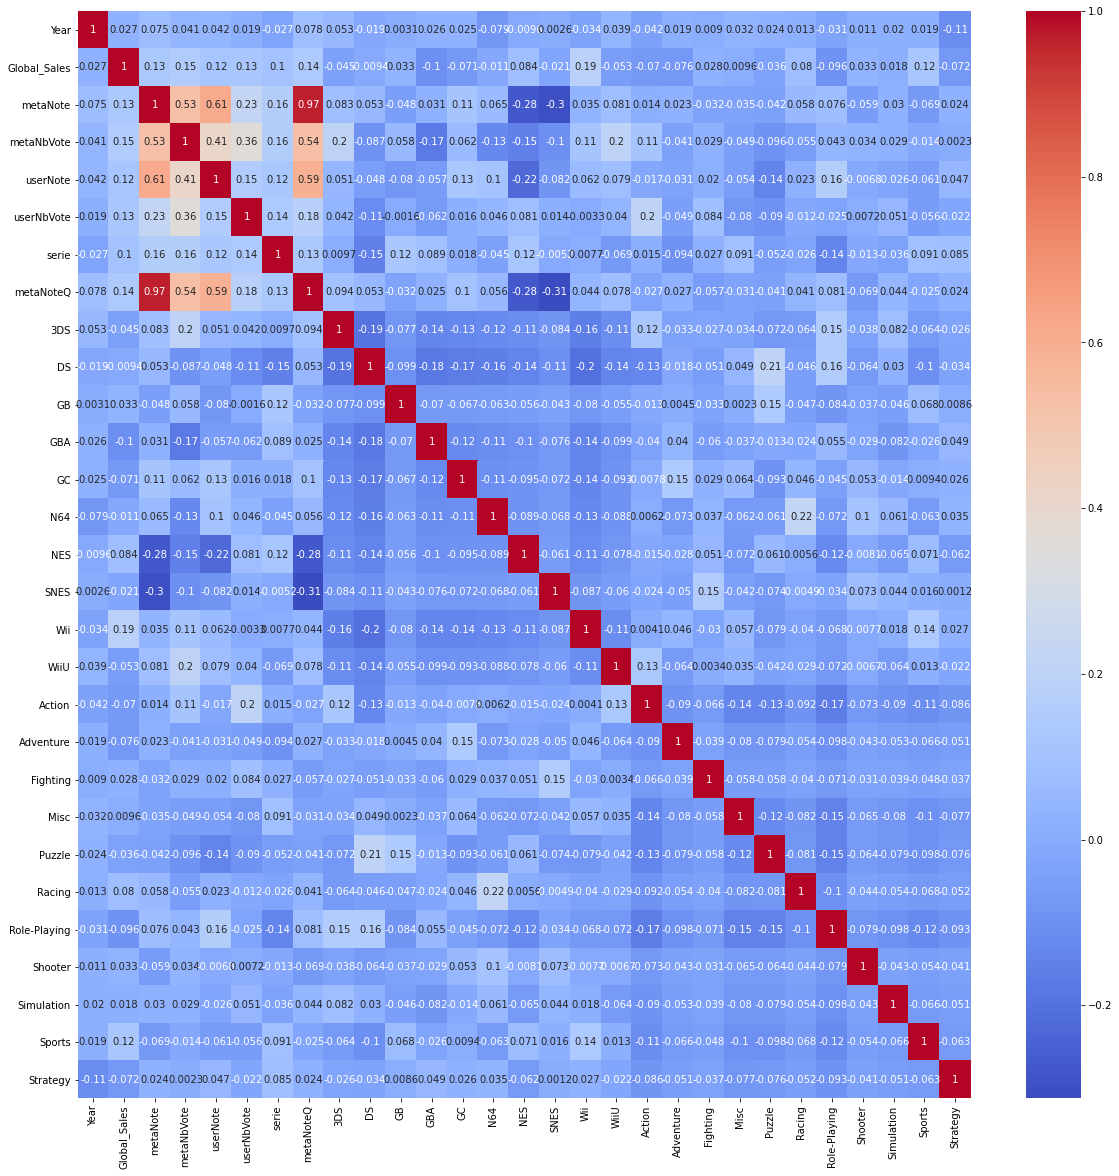

In [58]:
# preprocessing
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit_transform(fusion)
matrice=fusion.corr()
fig,ax=plt.subplots(figsize=(20,20))
sns.heatmap(matrice, annot=True, cmap='coolwarm');

# définition de la target et data
target = fusion['Global_Sales']
data = fusion.drop(['Global_Sales'],axis=1)

# séparation en jeu d'entrainement et de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

In [65]:
# Test du modèle de regression linéaire

from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(X_train,y_train)
print("Train score :", clf.score(X_train,y_train))

clf.fit(X_test,y_test)
print("Test score :",clf.score(X_test,y_test))

# faire un encodage


# Retirer les outliers


# Figer la base (dans load&clean)

Train score : 0.1505409399974066
Test score : 0.34508737659100297


In [70]:
# Test du modèle KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7, metric='minkowski')
knn.fit(X_train,y_train)

ValueError: Unknown label type: 'continuous'

In [ ]:
x : dataset
y : nb de ventes -> quantitative -> modèle de régression (Regression Lineaire, Lasso, RIdge)
OU segmentation -> qualitative -> modèle catégoriel

Faire observation par année (position du jeu par rapport aux jeux de l'année)
1 si moitié sup
0 si moitié inf

Retirer les outlayers (les cas extrêmes/rares)

Extraction des données à partir du texte

Feature engineering : si jeu appartient à une série, quel est le nombre moyen de vente de cette série ?
grouper par publisher / moyenne de ventes

Faire l'étude sur Ubisoft / EA / Activision / Konami (plus large en terme de jeu)
Nintendo et Sony, un peu à part

Moyenne et écart-type : à donner au modèle

KNN R
Linear Regression
RandomForest
GradientBoostingRegressor
XGBoost
Light GBM

Feature Engineering : Encoder les variables une seule fois
Category Encoders :
 Count Encoder
 Target Encoder
import category_encoders as ce

Pipeline de scikitlearn



test de modèle puis 
Recherche d'hyperparamètres (gridSearch)

Comparaison des modèles

Sélection du modèle optimal